# Practical Machine Learning for Physicists
## Week 1: Visualizing Neural Networks with Pure Python / Tutorials

This notebook is taken almost verbatim from the "Machine Learning for Physicists" by Florian Marquardt course. That course is online at https://machine-learning-for-physicists.org and like that course all the material is released under the Creative Commons Sharealike license.

This notebook shows how to:
- visualize neural networks

The networks have 2 input and 1 output neurons, but arbitrarily many hidden layers, and also you can choose the activation functions

### Imports: only numpy and matplotlib

In [ ]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150 # dots per inch

# for nice inset colorbars:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Neural Network Visualisation Functions

Now before you go any further remember the highly overused words of Douglas Adams and **Don't Panic**. It is not expected that you immeidately understand all of the code in the following cell. However you will find if you look at any of the given lines or functions you will be able to piece together what the code is doing.

To help you we will explain some of thing functions
* `apply_layer(y_in,w,b,activation)` this is the function that calculated a layer of the neural network basically returning  $f(w \cdot y +b)$ where f is the named activation function
* `apply_net(y_in,weights,biases,activations)` this function loops over all layers and caluclates the full network
* `plot` functions just plot either neurons or connections in our simple network diagrams
* `visualize_network` this is the function you call which plots both the network diagram and then the 2D surface of the network output over the range specified.


**My recommendation is that you don't worry too much about the code but go and look at the outputs of the simple networks below.**

In [ ]:
def apply_layer(y_in,w,b,activation):
    """
    Go from one layer to the next, given a
    weight matrix w (shape [n_neurons_in,n_neurons_out])
    a bias vector b (length n_neurons_out)
    and the values of input neurons y_in
    (shape [batchsize,n_neurons_in])

    returns the values of the output neurons in the next layer
    (shape [batchsize, n_neurons_out])
    """
    # to understand the following line, watch the beginning of lecture 2
    z=np.dot(y_in,w)+b # batch processing: y_in is of shape [batchsize,num_neurons_in]
    if activation=='sigmoid':
        return(1/(1+np.exp(-z)))
    elif activation=='jump':
        return(np.array(z>0,dtype='float'))
    elif activation=='linear':
        return(z)
    elif activation=='reLU':
        return((z>0)*z)
    else:
        print("Unknown activation function, only sigmoid, jump, linear and reLU supported")

def apply_net(y_in,weights,biases,activations):
    """
    Apply a whole network of multiple layers
    """
    y=y_in
    for j in range(len(biases)):
        y=apply_layer(y,weights[j],biases[j],activations[j])
    return(y)

# some internal routines for plotting the network:
def plot_connection_line(ax,X,Y,W,vmax=1.0,linewidth=3):
    t=np.linspace(0,1,20)
    if W>0:
        col=[0,0.4,0.8]
    else:
        col=[1,0.3,0]
    ax.plot(X[0]+(3*t**2-2*t**3)*(X[1]-X[0]),Y[0]+t*(Y[1]-Y[0]),
           alpha=abs(W)/vmax,color=col,
           linewidth=linewidth)

def plot_neuron_alpha(ax,X,Y,B,size=100.0,vmax=1.0):
    if B>0:
        col=[0,0.4,0.8]
    else:
        col=[1,0.3,0]
    ax.scatter([X],[Y],marker='o',c=np.atleast_2d([col]),alpha=abs(B)/vmax,s=size,zorder=10)

def plot_neuron(ax,X,Y,B,size=100.0,vmax=1.0):
    if B>0:
        col=[0,0.4,0.8]
    else:
        col=[1,0.3,0]
    ax.scatter([X],[Y],marker='o',c=np.atleast_2d([col]),s=size,zorder=10)

def visualize_network(weights,biases,activations,
                      M=100,x0range=[-1,1],x1range=[-1,1],
                     size=400.0, linewidth=5.0):
    """
    Visualize a neural network with 2 input
    neurons and 1 output neuron (plot output vs input in a 2D plot)

    weights is a list of the weight matrices for the
    layers, where weights[j] is the matrix for the connections
    from layer j to layer j+1 (where j==0 is the input)

    weights[j][m,k] is the weight for input neuron k going to output neuron m
    (note: internally, m and k are swapped, see the explanation of
    batch processing in lecture 2)

    biases[j] is the vector of bias values for obtaining the neurons in layer j+1
    biases[j][k] is the bias for neuron k in layer j+1

    activations is a list of the activation functions for
    the different layers: choose 'linear','sigmoid',
    'jump' (i.e. step-function), and 'reLU'

    M is the resolution (MxM grid)

    x0range is the range of x0 neuron values (horizontal axis)
    x1range is the range of x1 neuron values (vertical axis)
    """
    swapped_weights=[]
    for j in range(len(weights)):
        swapped_weights.append(np.transpose(weights[j]))

    x0,x1=np.meshgrid(np.linspace(x0range[0],x0range[1],M),np.linspace(x1range[0],x1range[1],M))
    y_in=np.zeros([M*M,2])
    y_in[:,0]=x0.flatten()
    y_in[:,1]=x1.flatten()
    y_out=apply_net(y_in,swapped_weights,biases,activations)

    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,4))

    # plot the network itself:

    # positions of neurons on plot:
    posX=[[-0.5,+0.5]]; posY=[[0,0]]
    vmax=0.0 # for finding the maximum weight
    vmaxB=0.0 # for maximum bias
    for j in range(len(biases)):
        n_neurons=len(biases[j])
        posX.append(np.array(range(n_neurons))-0.5*(n_neurons-1))
        posY.append(np.full(n_neurons,j+1))
        vmax=np.maximum(vmax,np.max(np.abs(weights[j])))
        vmaxB=np.maximum(vmaxB,np.max(np.abs(biases[j])))

    # plot connections
    for j in range(len(biases)):
        for k in range(len(posX[j])):
            for m in range(len(posX[j+1])):
                plot_connection_line(ax[0],[posX[j][k],posX[j+1][m]],
                                     [posY[j][k],posY[j+1][m]],
                                     swapped_weights[j][k,m],vmax=vmax,
                                    linewidth=linewidth)

    # plot neurons
    for k in range(len(posX[0])): # input neurons (have no bias!)
        plot_neuron(ax[0],posX[0][k],posY[0][k],
                   vmaxB,vmax=vmaxB,size=size)
    for j in range(len(biases)): # all other neurons
        for k in range(len(posX[j+1])):
            plot_neuron(ax[0],posX[j+1][k],posY[j+1][k],
                       biases[j][k],vmax=vmaxB,size=size)

    ax[0].axis('off')

    # now: the output of the network
    img=ax[1].imshow(np.reshape(y_out,[M,M]),origin='lower',
                    extent=[x0range[0],x0range[1],x1range[0],x1range[1]])
    ax[1].set_xlabel(r'$x_0$')
    ax[1].set_ylabel(r'$x_1$')

    axins1 = inset_axes(ax[1],
                    width="40%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='upper right')

    imgmin=np.min(y_out)
    imgmax=np.max(y_out)
    color_bar=fig.colorbar(img, cax=axins1, orientation="horizontal",ticks=np.linspace(imgmin,imgmax,3))
    cbxtick_obj = plt.getp(color_bar.ax.axes, 'xticklabels')
    plt.setp(cbxtick_obj, color="white")
    axins1.xaxis.set_ticks_position("bottom")

    plt.show()

## Some network visualisations


Now remember, because we want to plot the network output as a 2D plot we are restricted (for now) to networks that have two input values $x_0$ and $x_1$ and return a single output value $y_{out}$. For this style of network we can visualise the network output by defining a 2D grid of pairs of input values (e.g. one point will be $x_0=-3$ and $x_1=3$ which will be in the top left-hand corner of the plot below) the colour plotted in that pixel location will be the network output with those input values.

### Simplest possible network visualisation

The simplest possible network with 1 output node and 2 input nodes is the one which has no hidden layers. So the two input nodes are both connected to the output node (with different weights) and then a bias can be added. So let us set our weights to be 0.2 for $x_0$ and 0.9 for $x_1$ and our bias to be $b=0.5$ then the network below will calculate
$$ y_{out} =  f(0.2 x_0 + 0.9 x_1 + 0.5)$$
where $f$ is our activation function (in the default case the sigmoid function).

When we plot this over the $x_0$, $x_1$ grid we would expect the gradient in the $x_1$ direction to be much stronger than the gradient in the $x_0$ direction since the biases are 0.9 vs 0.2.

Below we will also draw the network diagram with the input nodes at the bottom and the output nodes at the top, positive weights will be blue and negative weights red, the opacity of the line will represent the magnitude of the weight.



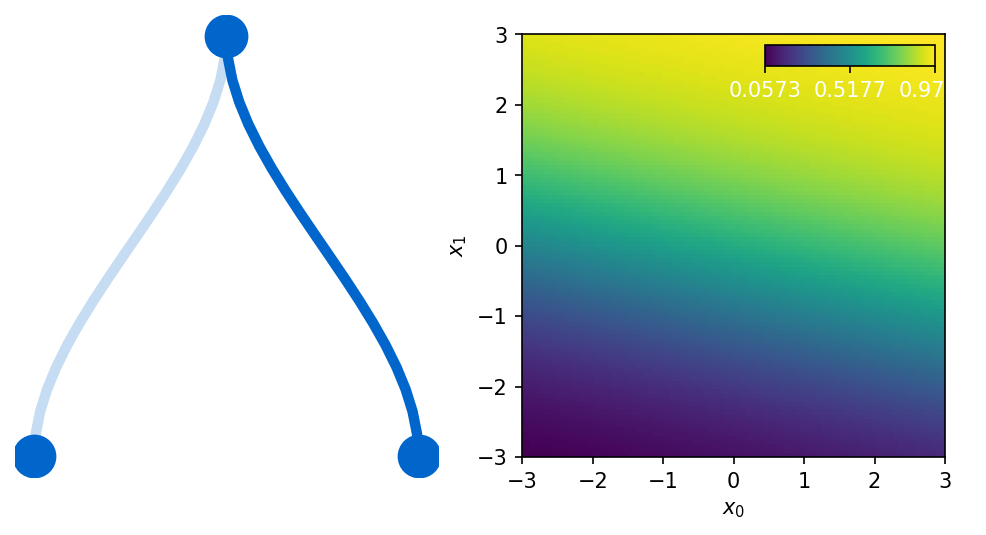

In [ ]:
#Call the visualize_network function
# weights is a 3D list of the weights connecting the various layers
# in this case we just have input and output layers so one layer of weights connecting them
# e.g. [[[w_0,w_1]]]
# Since we only have one output neuron (and no hidden) our 2D list of biases just contains a single number
# [[b_output]]
visualize_network(weights=[ [
    [0.2,0.9]  # weights of 2 input neurons for single output neuron
    ] ],
    biases=[
        [0.5] # bias for single output neuron
            ],
    activations=[ 'sigmoid' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3])

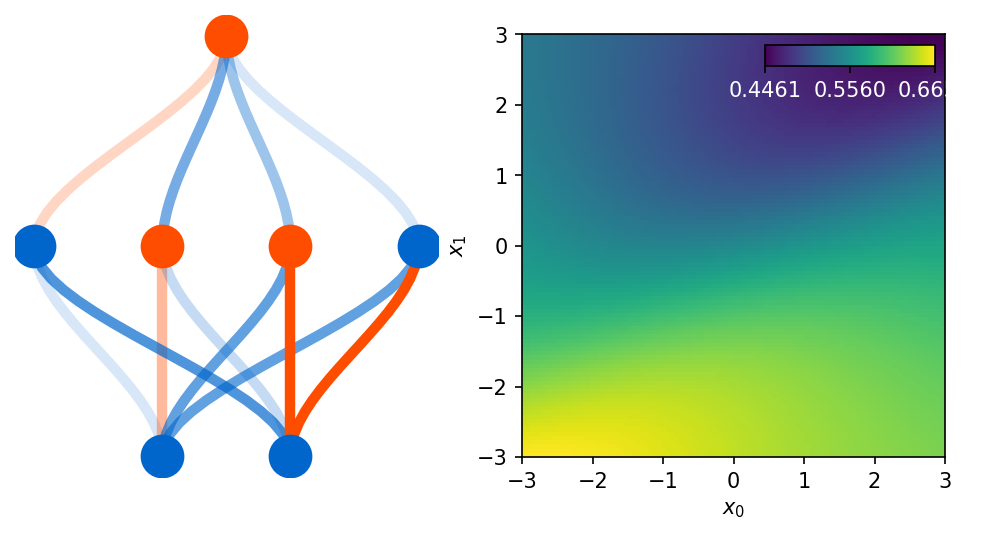

In [ ]:
#Call the visualize_network function
# weights is a 3D list of the weights connecting the various layers
# in this case we have added 4 hidden nodes in a single layer between the input and output layers so our weights list is more complicated
# e.g. [ [[w1_00,w1_01],[w1_10,w1_11],[w1_20,w1_21],[w1_30,w1_31]] , [ [w2_00,w2_01,w2_02,w2_03] ] ]
# We still have a single bias value for the output layer but no we have four bias values for the hidden layer
# [[b1_0,b1_1,b1_2,b1_3],[b_output]]


visualize_network(weights=[ [
    [0.2,0.9],  # weights of 2 input neurons for 1st hidden neuron
    [-0.5,0.3], # weights of 2 input neurons for 2nd hidden
    [0.8,-1.3],  # weights of 2 input neurons for 3rd hidden
    [0.8,-1.3]  # weights of 2 input neurons for 4th hidden
    ], #1st Layer Weights
    [
        [-0.3,0.7,0.5,0.2] # weights of 4 hidden neurons for output
    ]  ],
    biases=[
        [0.1,-0.5,-0.5,0.1], # biases of 3 hidden neurons
        [-0.2] # bias for output neuron
            ],
    activations=[ 'sigmoid', # activation for hidden
                'sigmoid' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3])

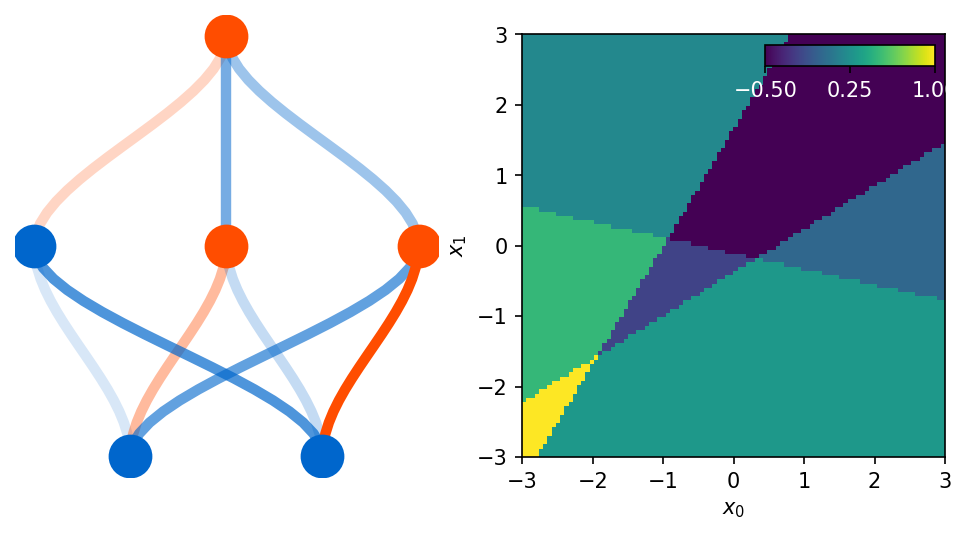

In [ ]:
visualize_network(weights=[ [
    [0.2,0.9],  # weights of 2 input neurons for 1st hidden neuron
    [-0.5,0.3], # weights of 2 input neurons for 2nd hidden
    [0.8,-1.3]  # weights of 2 input neurons for 3rd hidden
    ],
    [
        [-0.3,0.7,0.5] # weights of 3 hidden neurons for output
    ]  ],
    biases=[
        [0.1,-0.5,-0.5], # biases of 3 hidden neurons
        [-.2] # bias for output neuron
            ],
    activations=[ 'jump', # activation for hidden
                'linear' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3])

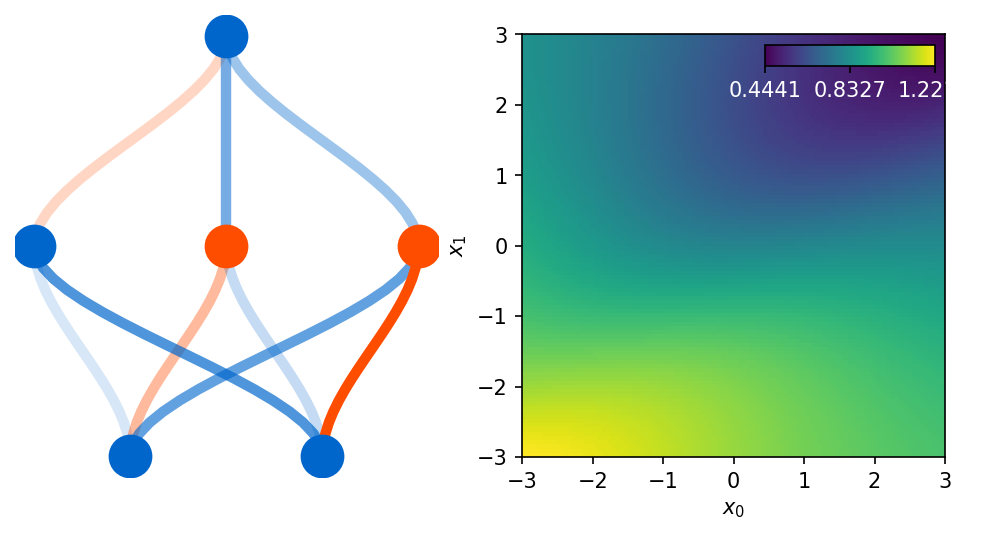

In [ ]:
# the same, but with sigmoid (and more compactly written)
visualize_network(weights=[
    [ [0.2,0.9],  [-0.5,0.3], [0.8,-1.3]  ],        #Weights from input->hidden
    [ [-0.3,0.7,0.5] ]  # Weights from hidden->output
    ],
    biases=[
        [0.1,-0.5,-0.5], #Bias @ hidden
        [0.5] # Bias @ output
    ],
    activations=[ 'sigmoid', # activation for hidden
                'linear' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3])

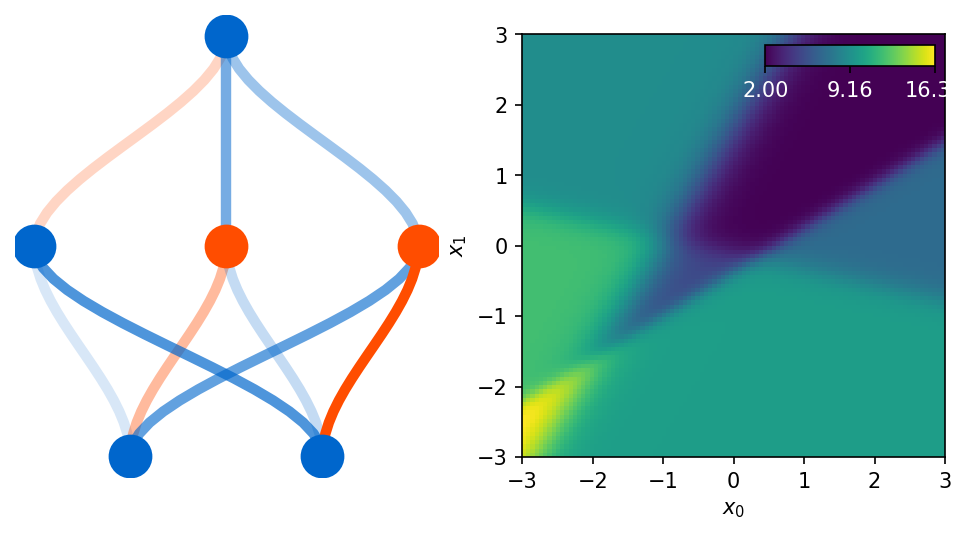

In [ ]:
# sharper sigmoid: scale all weights and biases!
factor=10.0
# this needs np.array(), because you cannot do factor*<python-list>

visualize_network(weights=[
    factor*np.array([ [0.2,0.9],  [-0.5,0.3], [0.8,-1.3]  ]),
    factor*np.array([ [-0.3,0.7,0.5] ])
    ],
    biases=[
        factor*np.array([0.1,-0.5,-0.5]),
        factor*np.array([0.5])
    ],
    activations=[ 'sigmoid', # activation for hidden
                'linear' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3])

## Further examples

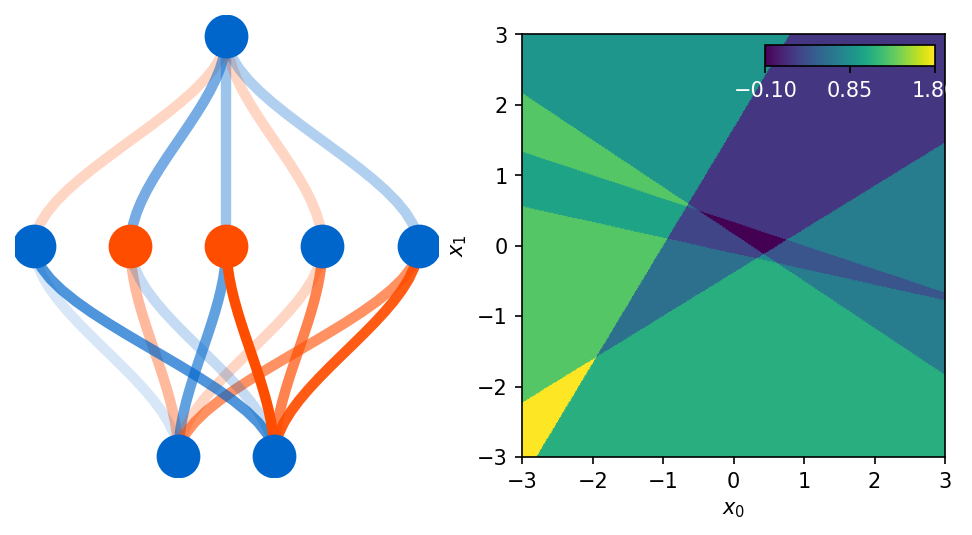

In [ ]:
# now with 5 intermediate neurons, for fun:

visualize_network(weights=[ [ [0.2,0.9],[-0.5,0.3],[0.8,-1.3],
                            [-0.3,-0.9], [-0.8,-1.2] ],
                           [ [-0.3,0.7,0.5,-0.3,0.4] ]  ],
                 biases=[ [0.1,-0.5,-0.5,0.3,0.2], [0.5] ],
                 activations=[ 'jump', 'linear' ],
                 x0range=[-3,3],x1range=[-3,3], M=400)

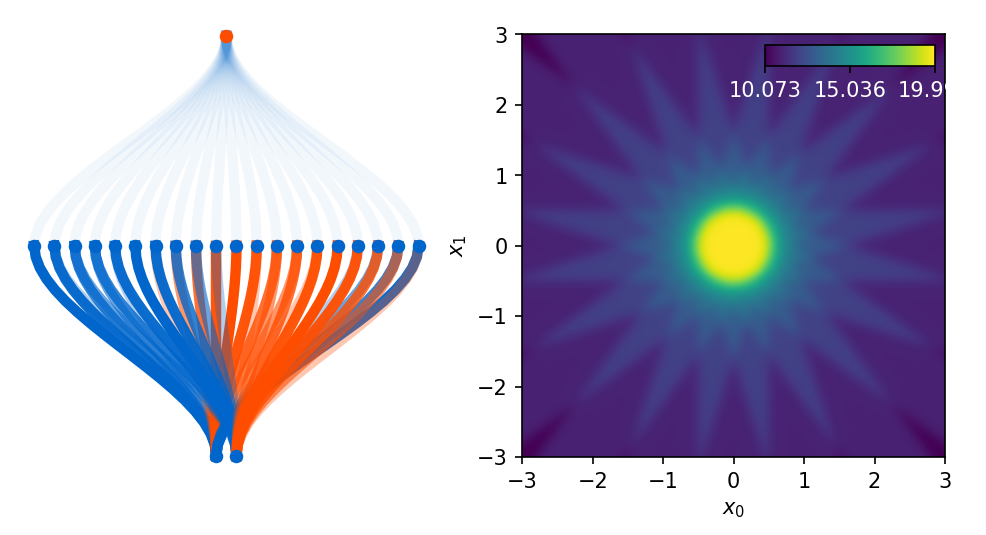

In [ ]:
# many superimposed lines
# this can be used to construct arbitrary shapes
# with only a single hidden layer

n_lines=20
phi=np.linspace(0,2*np.pi,n_lines+1)[0:n_lines]

# sharper sigmoid: scale all weights and biases!
factor=20.0
weight_array=np.zeros([n_lines,2])
weight_array[:,0]=factor*np.cos(phi)
weight_array[:,1]=factor*np.sin(phi)
bias_array=np.full(n_lines,factor*(+0.5))

# this needs np.array(), because you cannot do factor*<python-list>
visualize_network(weights=[
    weight_array,
    np.full([1,n_lines],1.0)
    ],
    biases=[
        bias_array,
        [0.0]
    ],
    activations=[ 'sigmoid', # activation for hidden
                'linear' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3],
                 size=30.0,M=400)

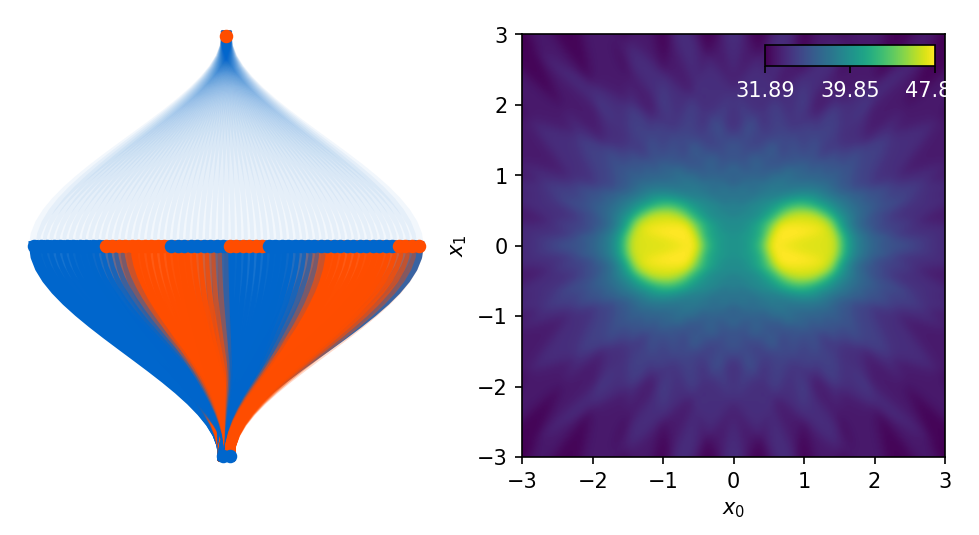

In [ ]:
# two blobs, each constructed using many superimposed lines
# this can be used to construct arbitrary shapes
# with only a single hidden layer

n_lines=30
phi=np.linspace(0,2*np.pi,n_lines+1)[0:n_lines]

shifts=[-1,1]
n_blobs=len(shifts)
full_weight_array=np.zeros([n_blobs*n_lines,2])
full_bias_array=np.zeros(n_blobs*n_lines)

j=0
for shift in shifts:
    weight_array=np.zeros([n_lines,2])
    weight_array[:,0]=factor*np.cos(phi)
    weight_array[:,1]=factor*np.sin(phi)
    bias_array=np.full(n_lines,factor*(+0.5-shift*np.cos(phi)))
    full_weight_array[j*n_lines:(j+1)*n_lines,:]=weight_array[:,:]
    full_bias_array[j*n_lines:(j+1)*n_lines]=bias_array[:]
    j+=1

# sharper sigmoid: scale all weights and biases!
factor=20.0
# this needs np.array(), because you cannot do factor*<python-list>
visualize_network(weights=[
    full_weight_array,
    np.full([1,n_blobs*n_lines],1.0)
    ],
    biases=[
        full_bias_array,
        [0.0]
    ],
    activations=[ 'sigmoid', # activation for hidden
                'linear' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3],
                 size=30.0,M=400)

## The AND function

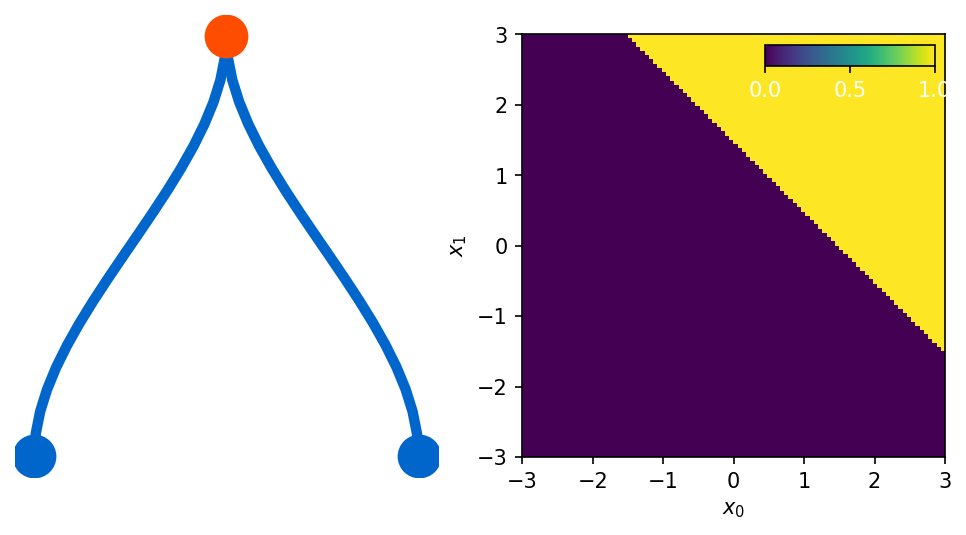

In [ ]:
# the AND function
# this computes the AND function of the inputs,
# in the sense that x1=+1,y2=+1 maps to +1, but
# the other combinations (like x1=0,y2=+1 etc.) all map to 0

visualize_network(weights=[ [
    [1.0,1.0]  # weights of 2 input neurons for single output neuron
    ] ],
    biases=[
        [-1.5] # bias for single output neuron
            ],
    activations=[ 'jump' # activation for output
                ],
    x0range=[-3,3],x1range=[-3,3])

# Suggested tasks
## 1. Implement a network that computes OR
So one that returns:
$$
y=\begin{cases}
       +1 & \text{for }x_0>0\text{ OR }x_1>0 \\
       0 & \text{otherwise}  \\
       \end{cases}
$$

## 2. Implement a network that computes XOR
So one that returns:
$$
y=\begin{cases}
       +1 & \text{for }(x_0>0\text{ AND }x_1<0)\text{ OR }(x_0<0\text{ AND }x_1>0) \\
       0 & \text{otherwise}  \\
       \end{cases}
$$
## 3. Implement a network that computes XOR with just 1 hidden layer